In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm import tqdm
import numpy as np
from random import shuffle
import cv2

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
train_file="/content/drive/My Drive/Colab Notebooks/train.zip"
test_file="/content/drive/My Drive/Colab Notebooks/test.zip"

In [4]:
import zipfile

with zipfile.ZipFile(test_file,'r') as z:
  z.extractall()
with zipfile.ZipFile(train_file,'r') as z:
  z.extractall()


In [5]:
ls

drive/  sample_data/  test/  train/


In [6]:
TEST_DIR="./test/ "
TRAIN_DIR="./train/"
LEARNING_RATE=1e-3
MODEL_NAME="dogvscats-{}-{}.model".format(LEARNING_RATE,"6conv-fire")
IMG_SIZE=50

In [7]:
def label_image(img):
  img_name=img.split(".")[-3]
  if img_name== "cat":
    return [1,0]
  elif img_name=="dog":
    return [0,1]

In [8]:
def create_train_data():
  training_data=[]

  for img in tqdm(os.listdir(TRAIN_DIR)):
    label=label_image(img)
    path=os.path.join(TRAIN_DIR,img)
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    training_data.append([np.array(img),np.array(label)])
  shuffle(training_data)
  np.save('train_data.npy',training_data)
  return training_data

In [9]:
train_data=create_train_data()
train_data=np.load('train_data.npy',allow_pickle=True,)

100%|██████████| 25000/25000 [00:26<00:00, 926.09it/s]


In [10]:
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression


# convnet=input_data(shape=[None,IMG_SIZE,IMG_SIZE,1],name='input')

# convnet=conv_2d(convnet,32,5,activation='relu')
# convnet=max_pool_2d(convnet,5)

# convnet=conv_2d(convnet,64,5,activation='relu')
# convnet=max_pool_2d(convnet,5)

# convnet=fully_connected(convnet,1024,activation='relu')
# convnet=dropout(convnet,0.8)

# convnet=fully_connected(convnet,2,activation='softmax')
# convnet=regression(convnet,optimizer='adam',learning_rate=LEARNING_RATE,loss='categorical_crossentropy',name='targets')

# model=tflearn.DNN(convnet,tensorboard_dir='log')

In [11]:
import tensorflow as tf
tf.reset_default_graph()

convnet=input_data(shape=[None,IMG_SIZE,IMG_SIZE,1],name='input')

convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=conv_2d(convnet,128,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)


convnet=fully_connected(convnet,1024,activation='relu')
convnet=dropout(convnet,0.8)

convnet=fully_connected(convnet,2,activation='softmax')
convnet=regression(convnet,optimizer='adam',learning_rate=LEARNING_RATE,loss='categorical_crossentropy',name='targets')

model=tflearn.DNN(convnet,tensorboard_dir='log')



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
keep_dims is deprecated, use keepdims instead





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







In [12]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
  model.load(MODEL_NAME)
  print('model loaded!')

In [13]:
train=train_data[:-500]
test=train_data[-500:]
print(train.shape)
print(test.shape)

(24500, 2)
(500, 2)


In [14]:
X=np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y=[i[1] for i in train]

test_x=np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y=[i[1] for i in test]

print(test_y)

[array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([1, 0]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([0, 1]), array([0, 1]), array([0, 1]), array([1,

In [15]:
model.fit({'input':X},{'targets':Y},n_epoch=20,validation_set=({'input':test_x},{'targets':test_y}),snapshot_step=500,show_metric=True,run_id=MODEL_NAME)

Training Step: 3829  | total loss: 0.40177 | time: 7.437s
| Adam | epoch: 010 | loss: 0.40177 - acc: 0.8217 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.40450 | time: 8.457s
| Adam | epoch: 010 | loss: 0.40450 - acc: 0.8192 | val_loss: 0.46035 - val_acc: 0.7820 -- iter: 24500/24500
--


In [16]:
testing_data=[]
for img in tqdm(os.listdir("./test/")):
  path=os.path.join("./test/",img)
  img_num=img.split('.')[0]
  img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  testing_data.append([np.array(img),img_num])

100%|██████████| 12500/12500 [00:13<00:00, 922.71it/s]


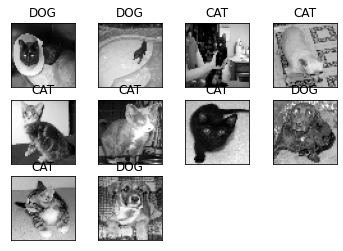

In [17]:
fig=plt.figure()
for num,data in enumerate(testing_data[:10]):
  #cat :[1,0]
  #dog: [0,1]
  img_num=data[1]
  img_data=data[0]

  y=fig.add_subplot(3,4,num+1)
  orig=img_data
  data=img_data.reshape(IMG_SIZE,IMG_SIZE,1)
  model_out=model.predict([data])[0]

  if np.argmax(model_out)==1: 
    str_label='DOG'
  else: 
    str_label='CAT'

  y.imshow(orig,cmap='gray')
  plt.title(str_label)
  y.axes.get_xaxis().set_visible(False)
  y.axes.get_yaxis().set_visible(False)
plt.show()